In [1]:
!wget http://planspace.org/20170505-simple_dataset_us_presidential_party_and_gdp_growth/president_gdp.csv
!wget http://planspace.org/20170502-canned_models_with_keras_in_tensorflow/n01882714_4157_koala_bear.jpg
%load_ext rpy2.ipython
!rm -rf tflinreg

--2017-05-08 16:58:34--  http://planspace.org/20170505-simple_dataset_us_presidential_party_and_gdp_growth/president_gdp.csv
Resolving planspace.org... 192.30.252.154, 192.30.252.153
Connecting to planspace.org|192.30.252.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297 [text/csv]
Saving to: 'president_gdp.csv.6'

president_gdp.csv.6 100%[=====================>]     297  --.-KB/s   in 0s     

2017-05-08 16:58:34 (14.2 MB/s) - 'president_gdp.csv.6' saved [297/297]

--2017-05-08 16:58:34--  http://planspace.org/20170502-canned_models_with_keras_in_tensorflow/n01882714_4157_koala_bear.jpg
Resolving planspace.org... 192.30.252.154, 192.30.252.153
Connecting to planspace.org|192.30.252.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129967 (127K) [image/jpeg]
Saving to: 'n01882714_4157_koala_bear.jpg.4'

n01882714_4157_koal 100%[=====================>] 126.92K   752KB/s   in 0.2s   

2017-05-08 16:58:35 (752 KB/s) - 'n01882714_41

In [2]:
!head -3 president_gdp.csv

term,party,growth
Truman,D,6.57
Eisenhower 1,R,2.72


Regression with `R`:

In [3]:
%%R

data = read.csv('president_gdp.csv')
model = lm(growth ~ party, data)
predict(model, data.frame(party=c('R', 'D')))

       1        2 
2.544444 4.332857 


Regression with `numpy`, `pandas`, and `scikit-learn`:

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('president_gdp.csv')
party = data.party == 'D'
party = np.expand_dims(party, axis=1)
growth = data.growth

In [5]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model.fit(X=party, y=growth)
model.predict([[0], [1]])

array([ 2.54444444,  4.33285714])

Regression with `tensorflow`:

# high-level ML APIs... training an Estimator

In [6]:
import tensorflow as tf

party_col = tf.contrib.layers.real_valued_column(column_name='')
model = tf.contrib.learn.LinearRegressor(feature_columns=[party_col],
                                         model_dir='tflinreg')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12579fad0>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [7]:
model.fit(x=party, y=growth, steps=1000)
list(model.predict(np.array([[0], [1]])))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


/Users/aaron/anaconda/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tflinreg/model.ckpt.
INFO:tensorflow:loss = 13.2432, step = 1
INFO:tensorflow:global_step/sec: 421.998
INFO:tensorflow:loss = 1.45393, step = 101 (0.237 sec)
INFO:tensorflow:global_step/sec: 660.257
INFO:tensorflow:loss = 1.40094, step = 201 (0.151 sec)
INFO:tensorflow:global_step/sec: 618.284
INFO:tensorflow:loss = 1.39256, step = 301 (0.162 sec)
INFO:tensorflow:global_step/sec: 546.887
INFO:tensorflow:loss = 1.38961, step = 401 (0.183 sec)
INFO:tensorflow:global_step/sec: 496.485
INFO:tensorflow:loss = 1.38855, step = 501 (0.202 sec)
INFO:tensorflow:global_step/sec: 631.588
INFO:tensorflow:loss = 1.38817, step = 601 (0.158 sec)
INFO:tensorflow:global_step/sec: 620.252
INFO:tensorflow:loss = 1.38804, step = 701 (0.163 sec)
INFO:tensorflow:global_step/sec: 444.577
INFO:tensorflow:loss = 1.38799, step = 801 (0.225 sec)
INFO:tensorflow:global_step/sec: 549.315
INFO:tensorflow:loss = 1.38797, step = 

[2.5422058, 4.3341689]

In [8]:
!tensorboard --logdir tflinreg

Starting TensorBoard 47 at http://0.0.0.0:6006
(Press CTRL+C to quit)
^C


After startup, go to http://localhost:6006/ to see the interface.

To continue with the notebook, interrupt the kernel by using the square "stop" button or by typing esc, i, i.

---

# high-level ML APIs... pre-trained Keras

In [9]:
model = tf.contrib.keras.applications.ResNet50()

In [10]:
filename = 'n01882714_4157_koala_bear.jpg'
image = tf.contrib.keras.preprocessing.image.load_img(
    filename, target_size=(224, 224))

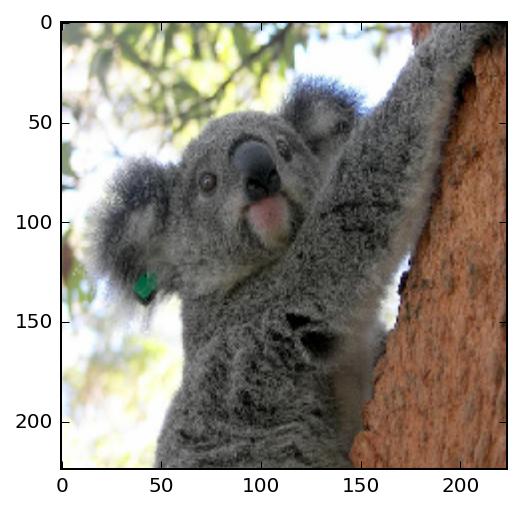

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image)

In [12]:
array = tf.contrib.keras.preprocessing.image.img_to_array(image)
array = np.expand_dims(array, axis=0)

In [13]:
probabilities = model.predict(array)

In [14]:
tf.contrib.keras.applications.resnet50.decode_predictions(probabilities)

[[(u'n01882714', u'koala', 0.99466419),
  (u'n02497673', u'Madagascar_cat', 0.0013330306),
  (u'n01877812', u'wallaby', 0.00085774728),
  (u'n02137549', u'mongoose', 0.00063530984),
  (u'n02123045', u'tabby', 0.00056512095)]]